In [80]:
import numpy as np
import pandas as pd

In [81]:
language_phonemes = np.load("./data/language_phonemes.npy", allow_pickle=True)
language_names = np.load("./data/language_names.npy", allow_pickle=True)[:, 0]

assert language_phonemes.shape[0] == language_names.shape[0]
language_names.shape, language_phonemes.shape

((2949,), (2949, 24, 22, 3))

For languages that have multiple samples in the Phoible dataset, we pick just one sample. Based on previous analysis, the best option seems to be to just pick the one whith the most phonemes per language, as this generally has more information (for example long and short versions of the phonemes).

In [82]:
unique_names, unique_names_count = np.unique(language_names, return_counts=True)

language_phonemes_selected = np.array(
    [language_phonemes[language_names == name].max(axis=0) for name in unique_names]
)

# sense check
for name in unique_names:
    assert (
        language_phonemes[language_names == name].shape[1:]
        == language_phonemes_selected.shape[1:]
    )

language_phonemes_selected.shape

(2740, 24, 22, 3)

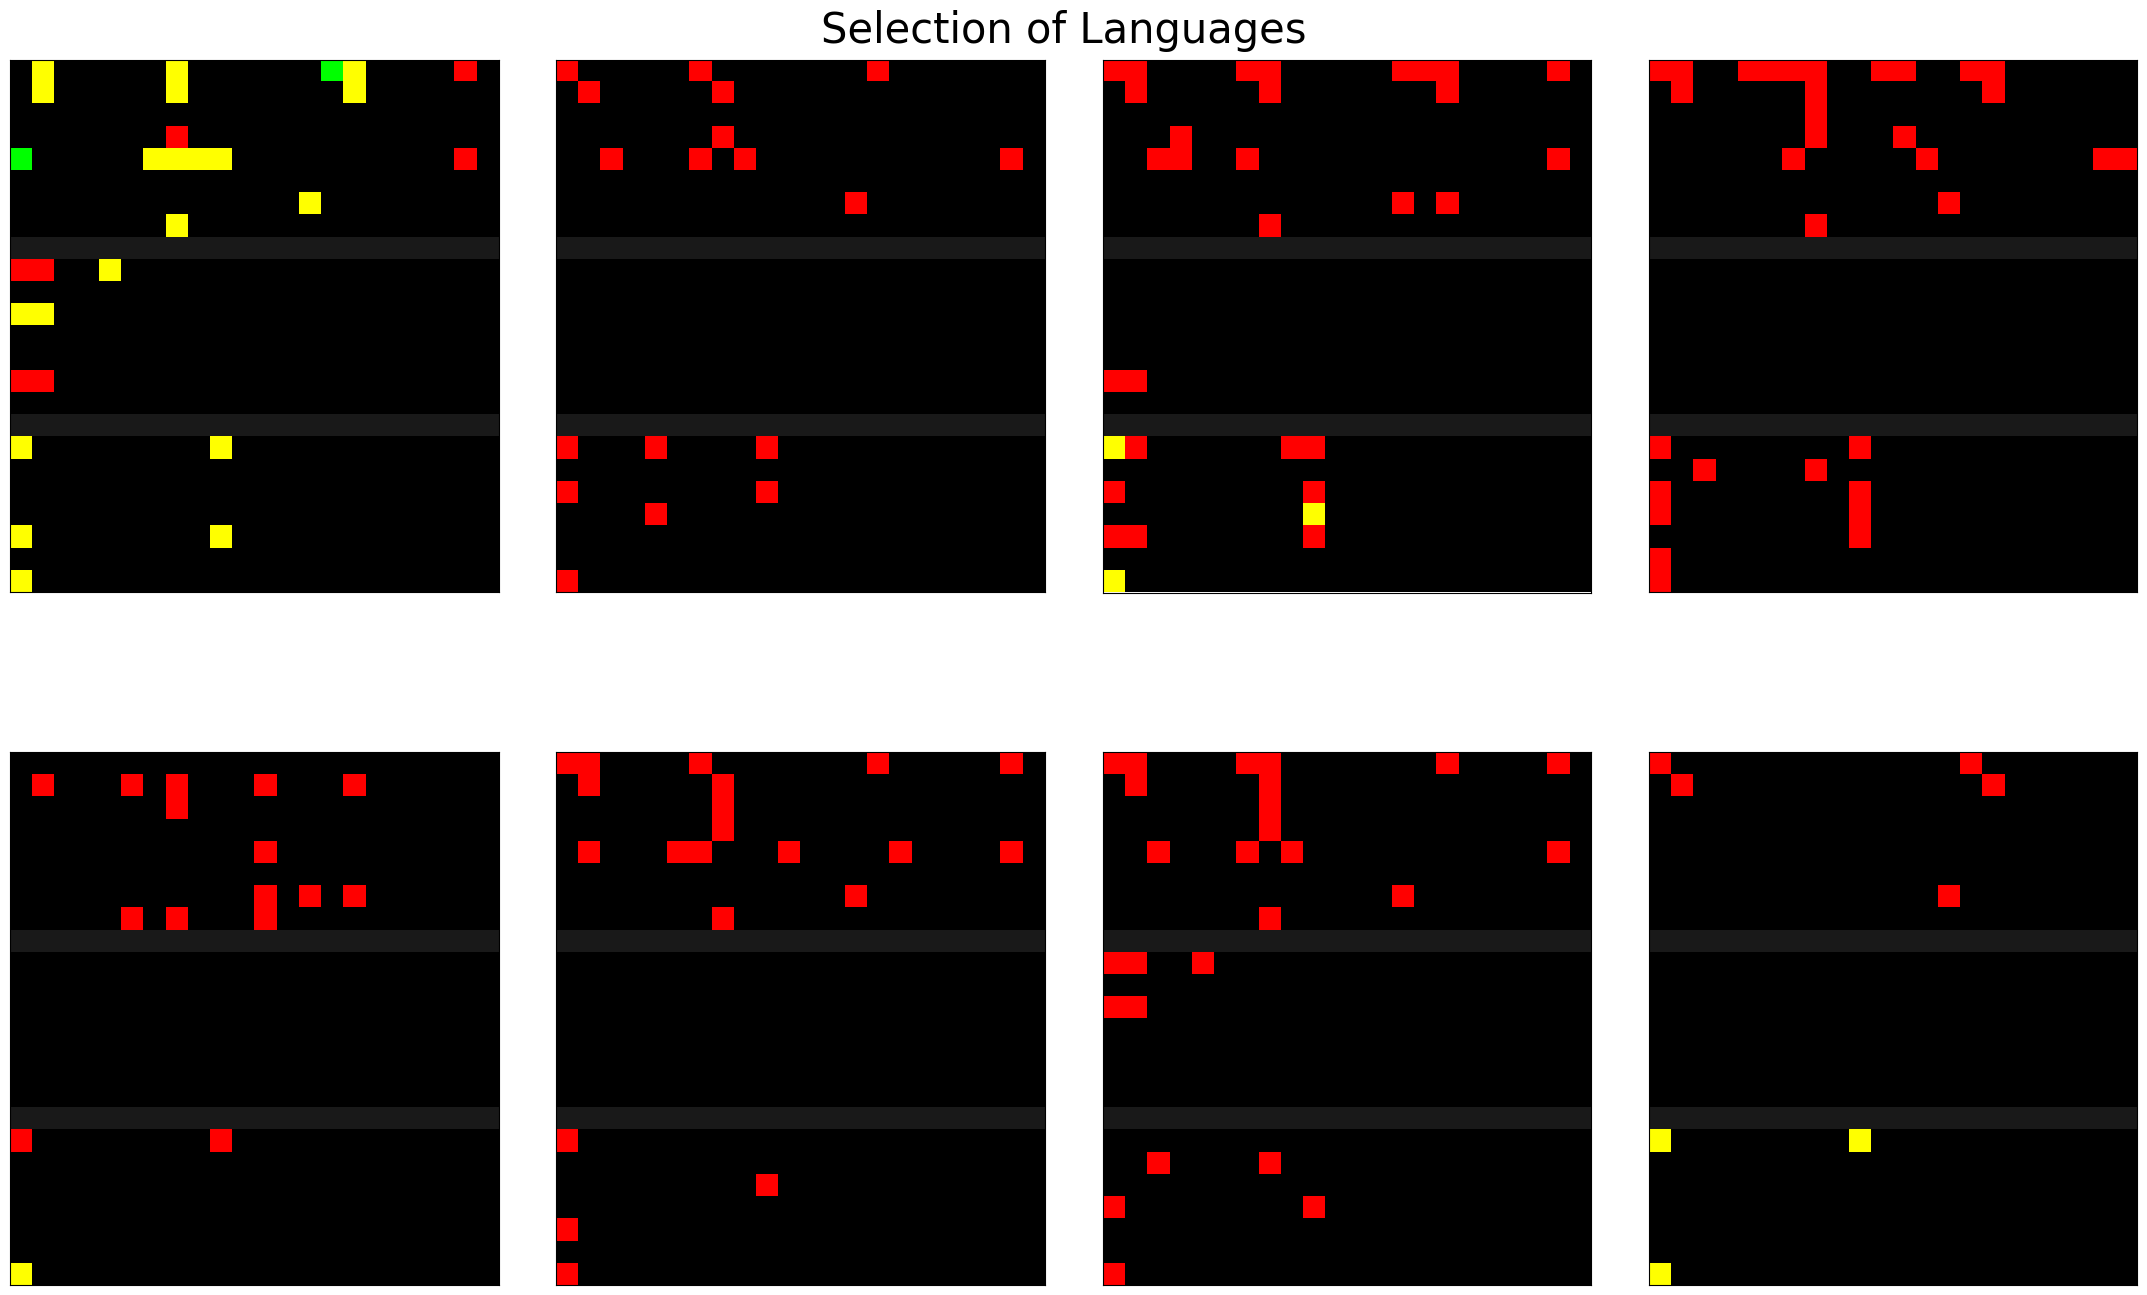

In [92]:
import matplotlib.pyplot as plt

r, c = 2, 4

gen = np.random.default_rng()
samples = gen.choice(language_phonemes_selected, r * c, replace=False)

fig, axs = plt.subplots(r, c, figsize=(22, 14), linewidth=10)
fig.tight_layout()

cnt = 0
for i in range(r):
    for j in range(c):
        axs[i, j].imshow(
            samples[cnt],
            cmap=plt.get_cmap("copper_r"),
            vmin=np.min(language_phonemes_selected),
            vmax=np.max(language_phonemes_selected),
        )
        axs[i, j].tick_params(
            left=False, right=False, labelleft=False, labelbottom=False, bottom=False
        )
        cnt += 1

fig.suptitle("Selection of Languages", fontsize=30)
plt.savefig("./images/language_selection.png")
plt.show()

In [84]:
np.save("./data/language_phonemes_selected.npy", language_phonemes_selected)

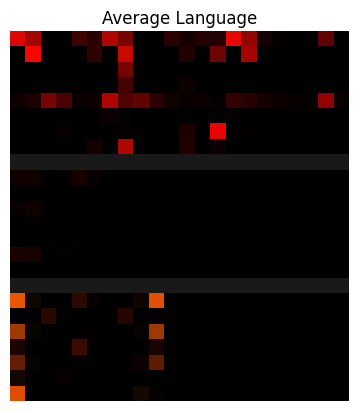

In [85]:
# what does an average language look like?

fig = plt.imshow(
    np.mean(language_phonemes_selected, axis=0),
    cmap=plt.get_cmap("copper_r"),
    vmin=np.min(language_phonemes_selected),
    vmax=np.max(language_phonemes_selected),
)
plt.axis("off")
plt.title("Average Language")
plt.savefig("./images/average_language.png")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..2649.0].


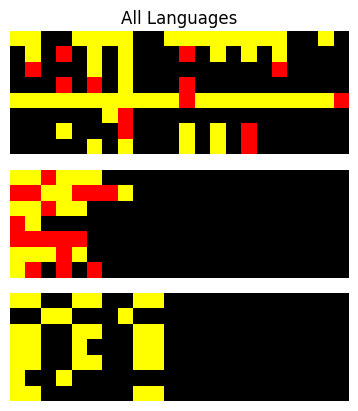

In [93]:
# what does the sum of all languages look like?

fig = plt.imshow(
    np.sum(language_phonemes_selected, axis=0),
    cmap=plt.get_cmap("copper_r"),
    vmin=np.min(language_phonemes_selected),
    vmax=np.max(language_phonemes_selected),
)
plt.axis("off")
plt.title("All Languages")
plt.savefig("./images/all_languages.png")
plt.show()